## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')

## Data Exploration

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


There are 8425 rows and 23 columns in this dataset. While taking "RainTomorrow" as a Target variable it is a classification problem and taking "Rainfall" as target variable it is a regression problem.

In [4]:
# Checking for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Creating a DataFrame to display missing values and their percentage
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0]  # Only show columns with missing values
missing_info.sort_values(by='Percentage (%)', ascending=False, inplace=True)

print("Columns with missing values:")
print(missing_info)


Columns with missing values:
               Missing Values  Percentage (%)
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
Rainfall                  240        2.848665
RainToday                 240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# Checking Number of Unique Values
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month and year from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Displaying the updated DataFrame
print(df[['Date', 'Month', 'Year']].head())

        Date  Month  Year
0 2008-12-01     12  2008
1 2008-12-02     12  2008
2 2008-12-03     12  2008
3 2008-12-04     12  2008
4 2008-12-05     12  2008


In [8]:
# Dropping the original 'Date' column
df.drop(columns=['Date'], inplace=True)

In [9]:
# Handling missing values
# Numerical columns: Filling with mean
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Categorical columns: Filling with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verifying if all missing values are handled
missing_values_after = df.isnull().sum()

# Displaying columns with missing values after handling
missing_info_after = pd.DataFrame({'Missing Values': missing_values_after, 'Percentage (%)': (missing_values_after / len(df)) * 100})
missing_info_after = missing_info_after[missing_info_after['Missing Values'] > 0]  
missing_info_after.sort_values(by='Percentage (%)', ascending=False, inplace=True)
print("Columns with missing values after handling:")
print(missing_info_after)

# Displaying updated DataFrame
print("\nUpdated DataFrame:")
print(df.head())

Columns with missing values after handling:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

Updated DataFrame:
  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   
3   Albury      9.2     28.0       0.0     5.389395  7.632205          NE   
4   Albury     17.5     32.3       1.0     5.389395  7.632205           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0          W        WNW  ...       1007.7       1007.1   
1           44.0        NNW        WSW  ...       1010.6       1007.8   
2           46.0          W        WSW  ...       1007.6       1008.7   
3           24.0         SE          E  ...       1017.6       1012.8   
4           41.0        ENE         NW  

## Data Visulization

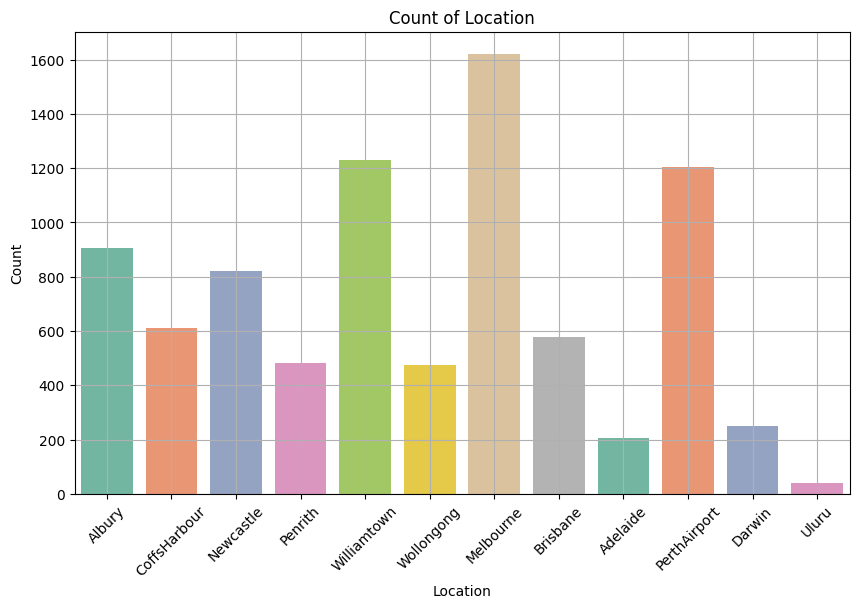

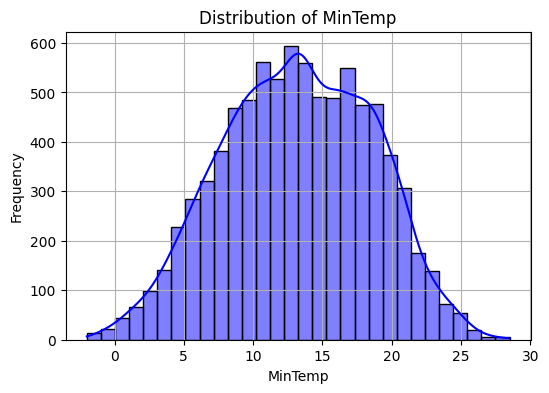

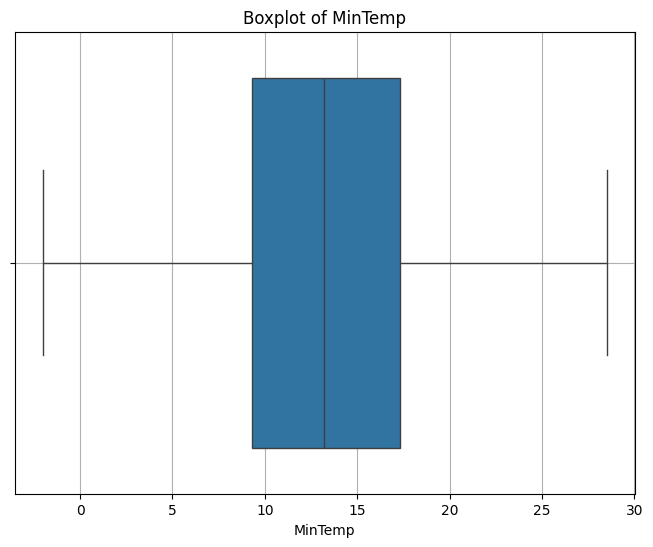

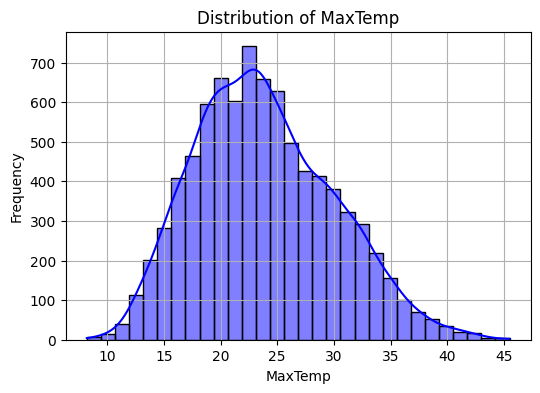

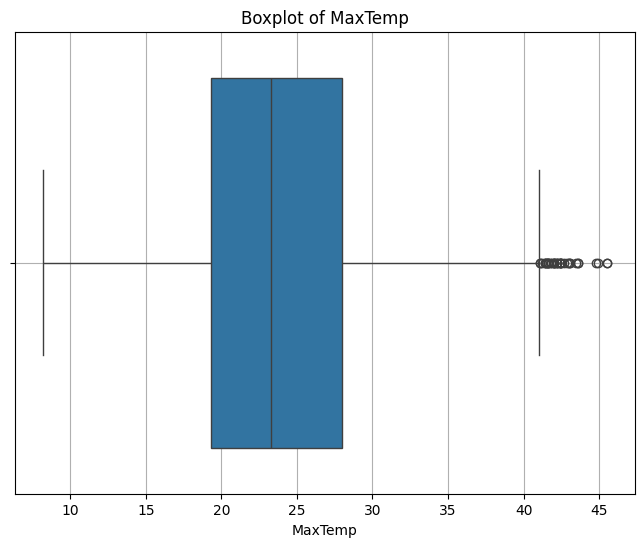

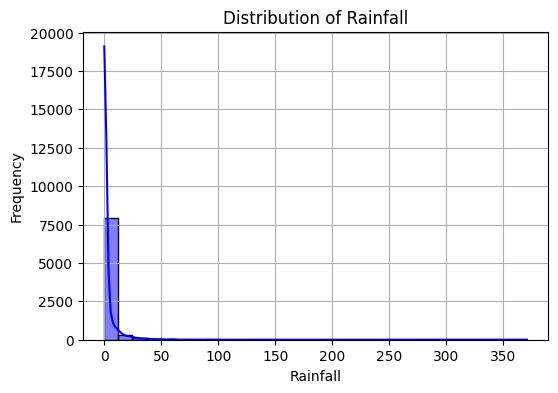

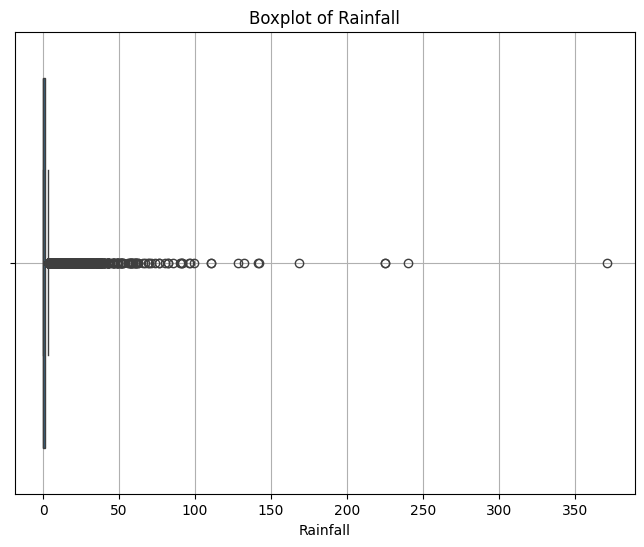

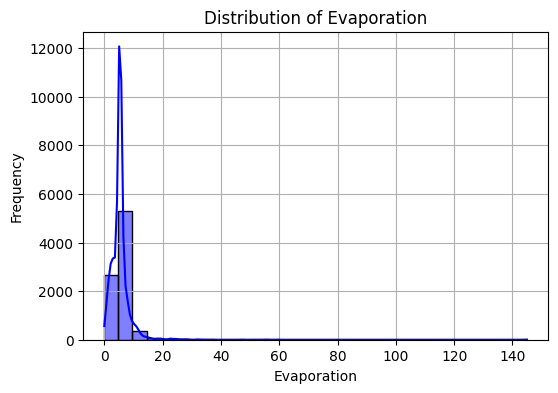

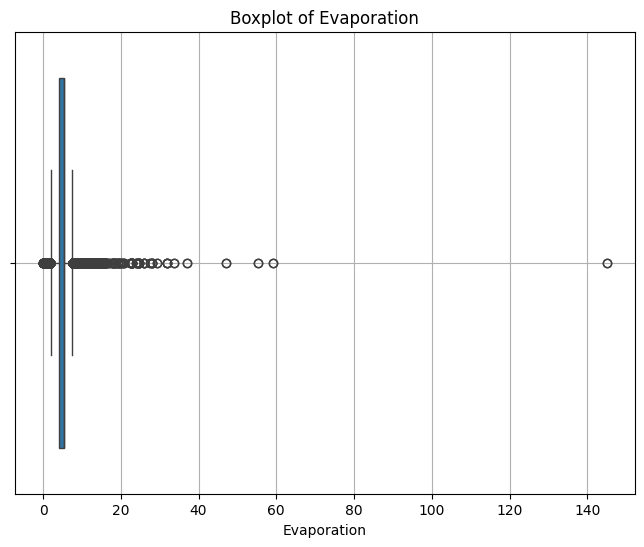

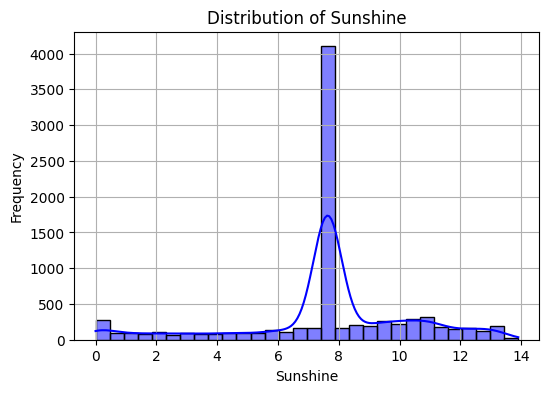

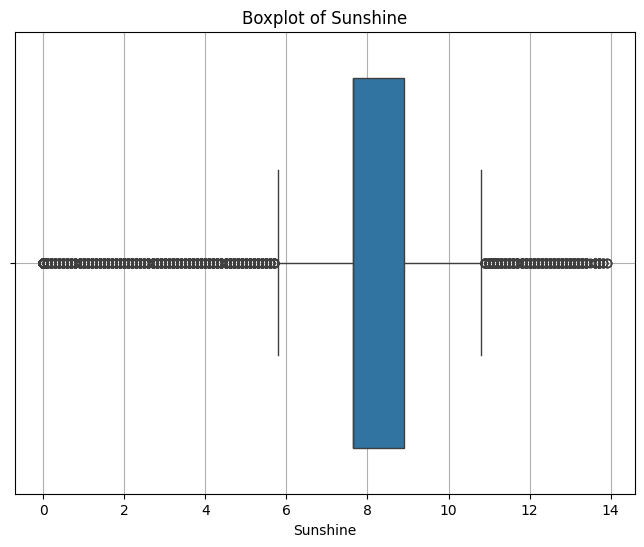

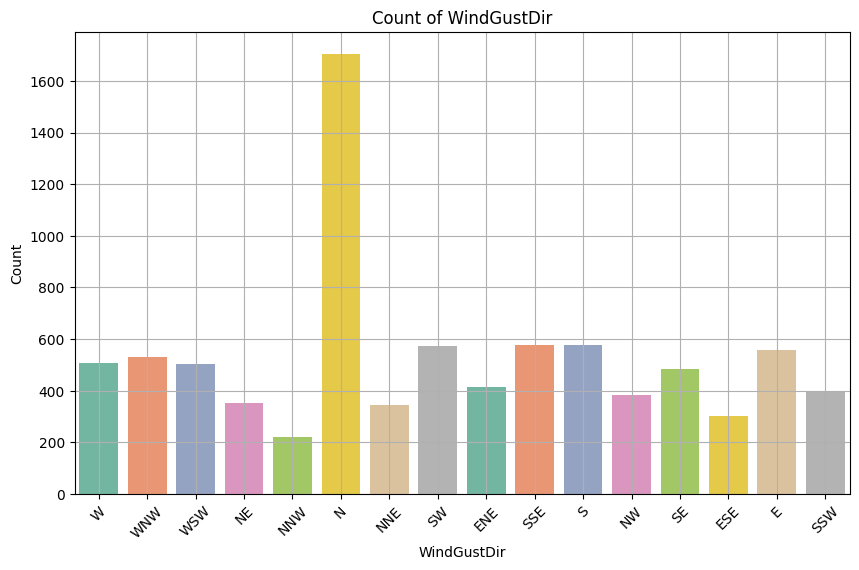

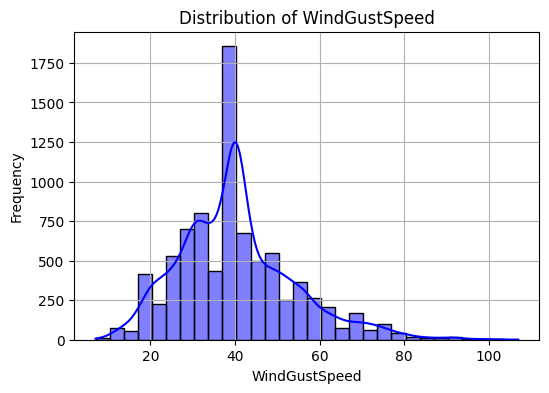

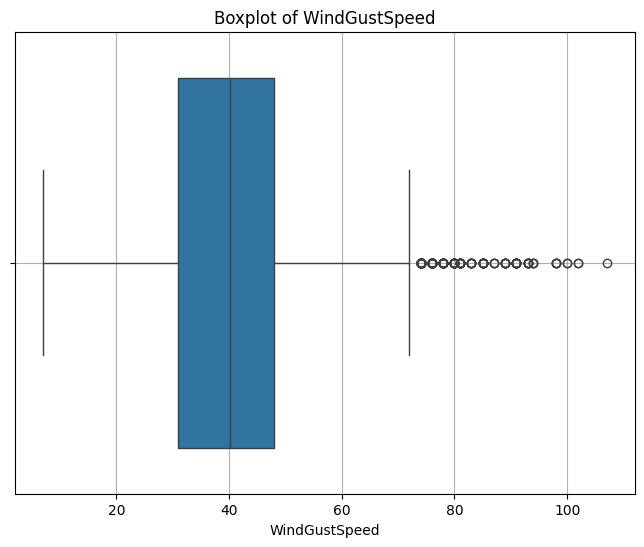

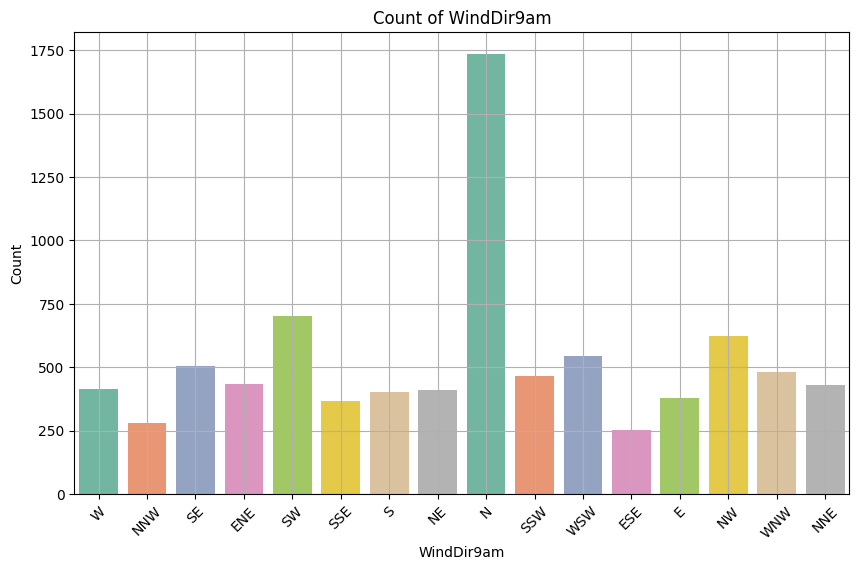

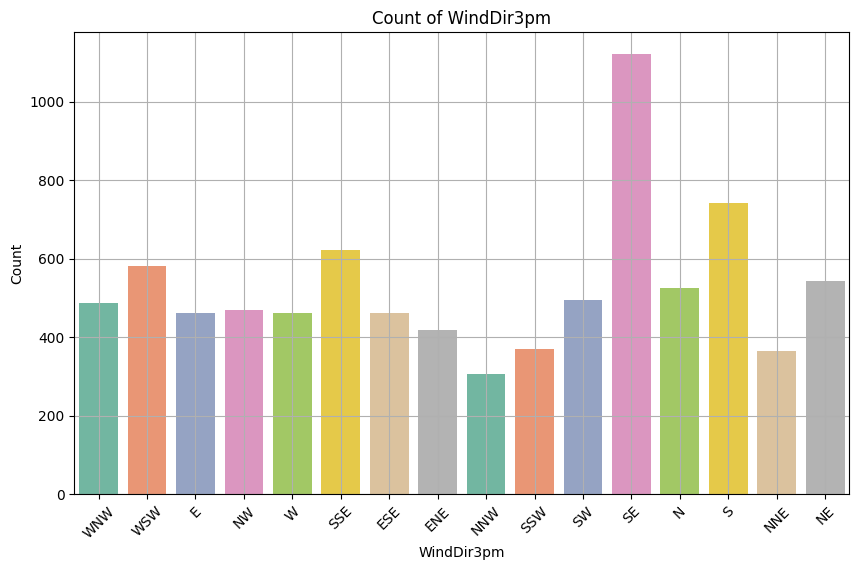

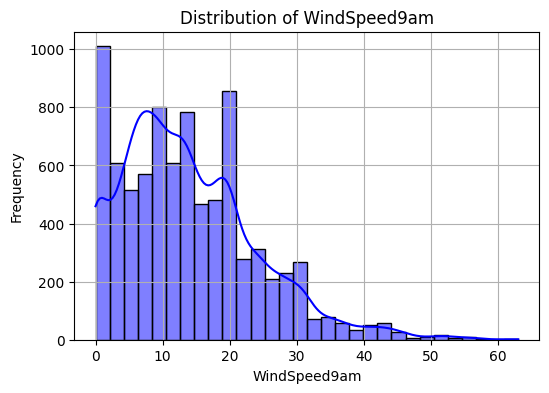

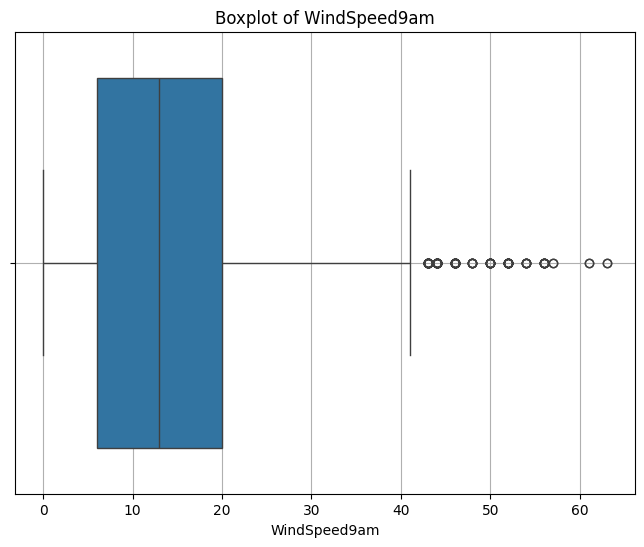

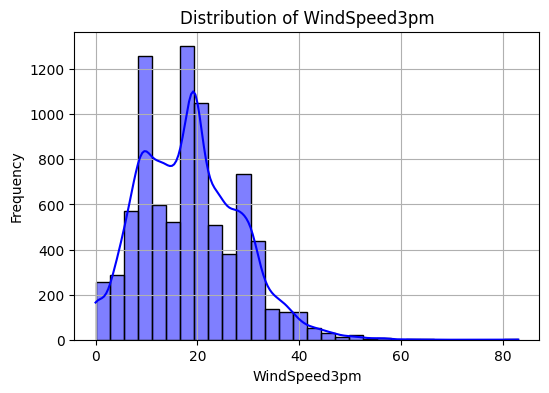

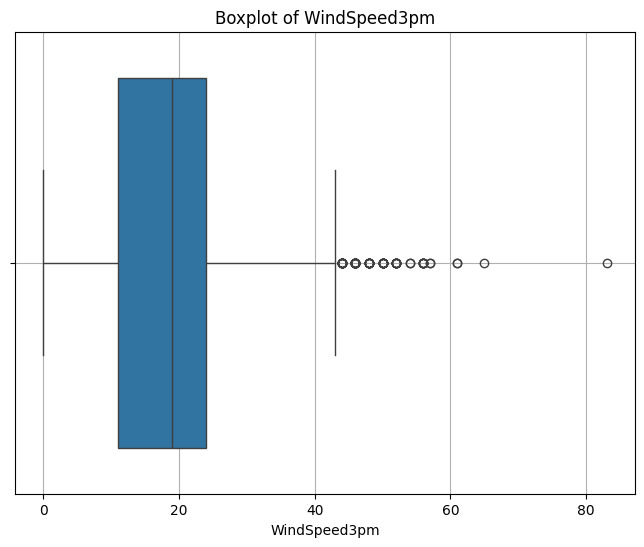

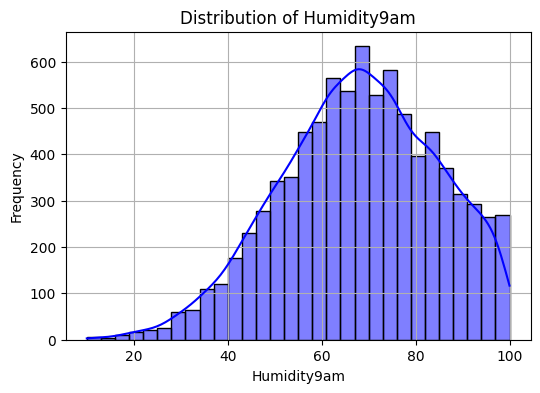

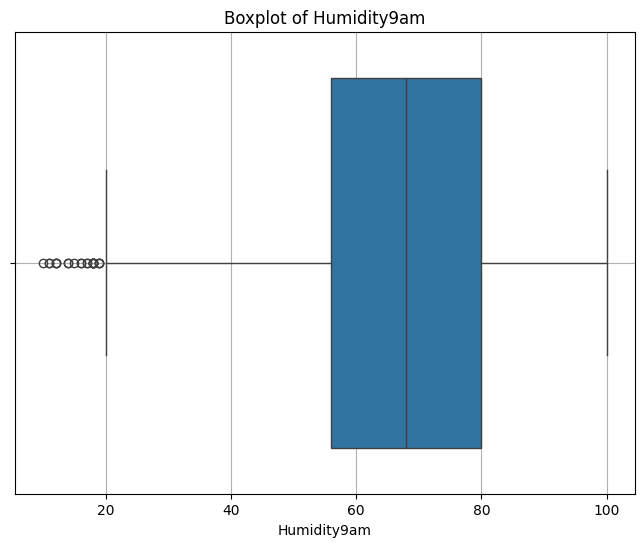

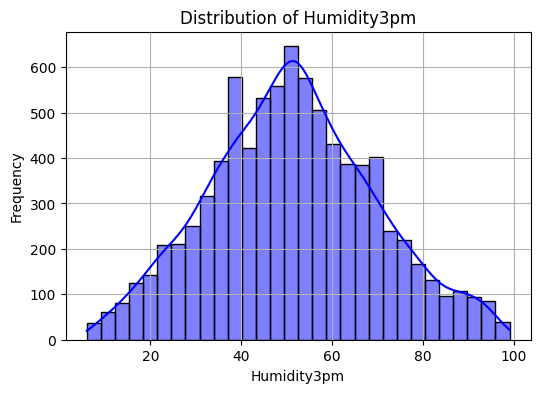

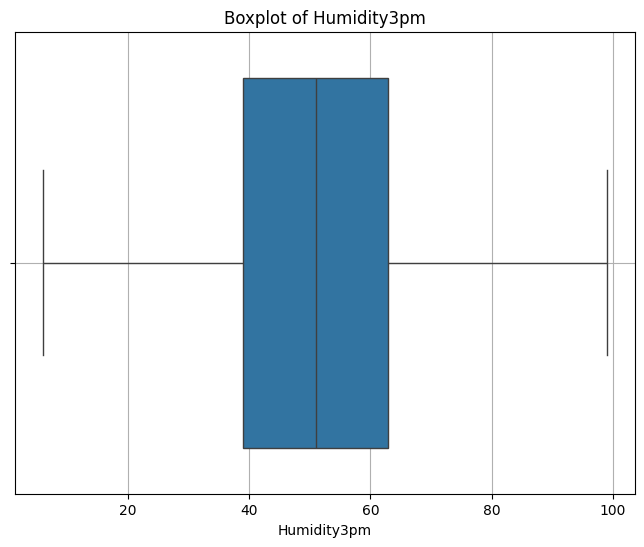

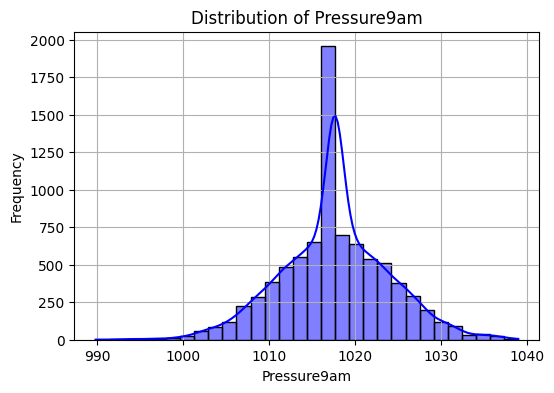

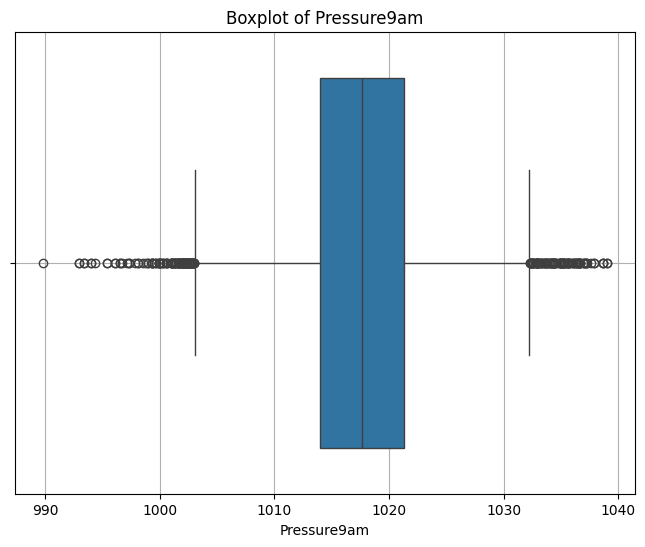

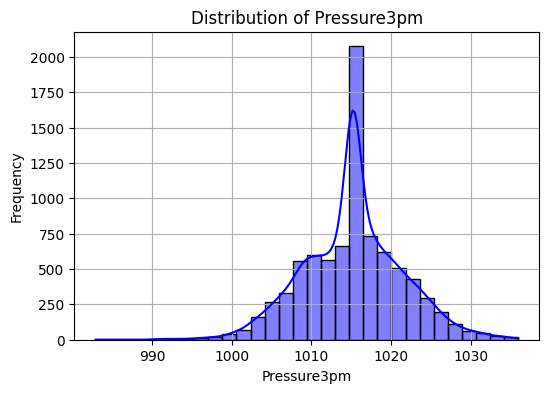

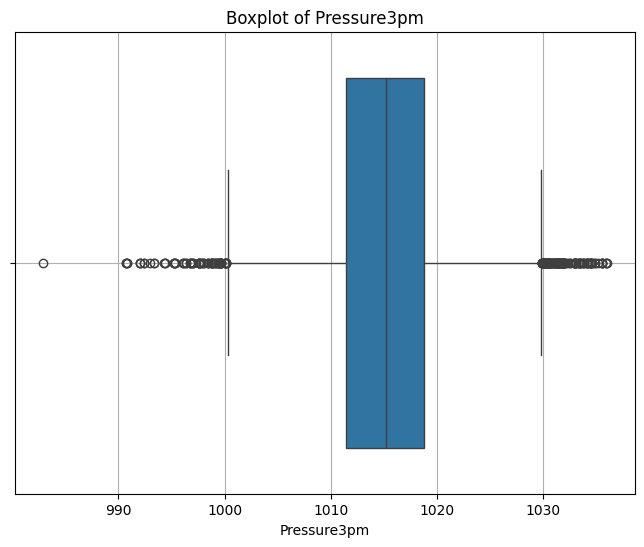

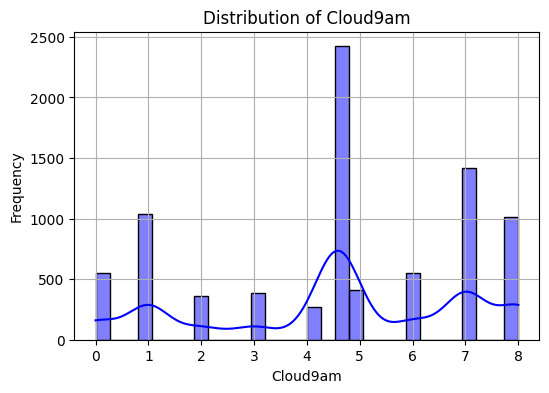

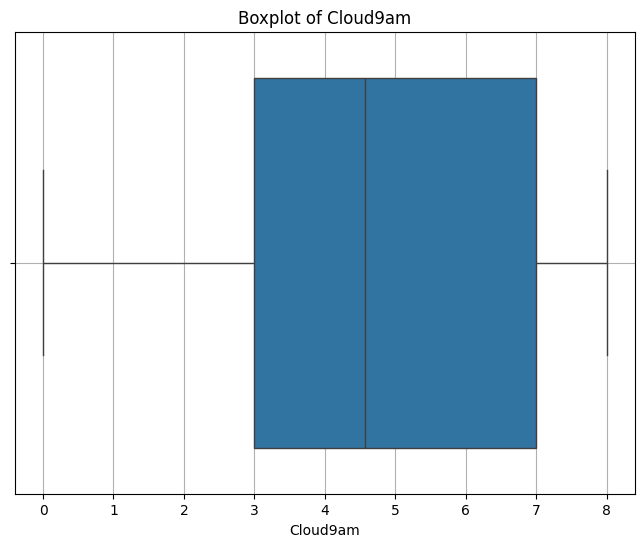

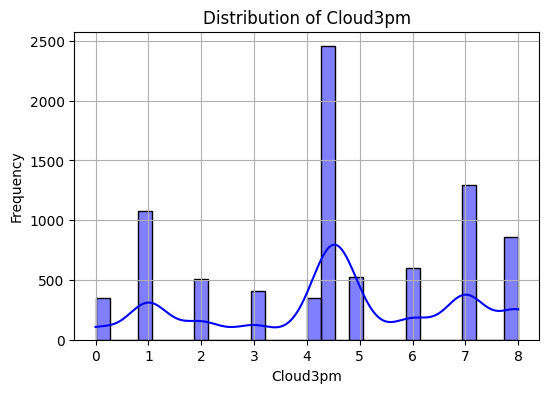

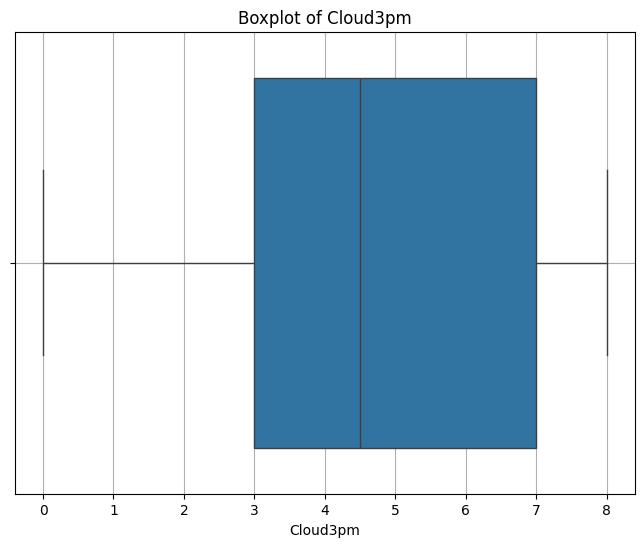

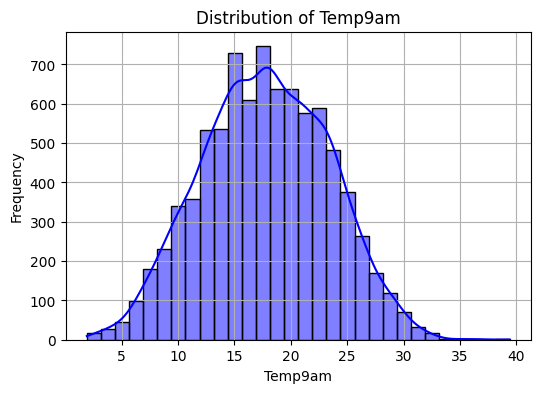

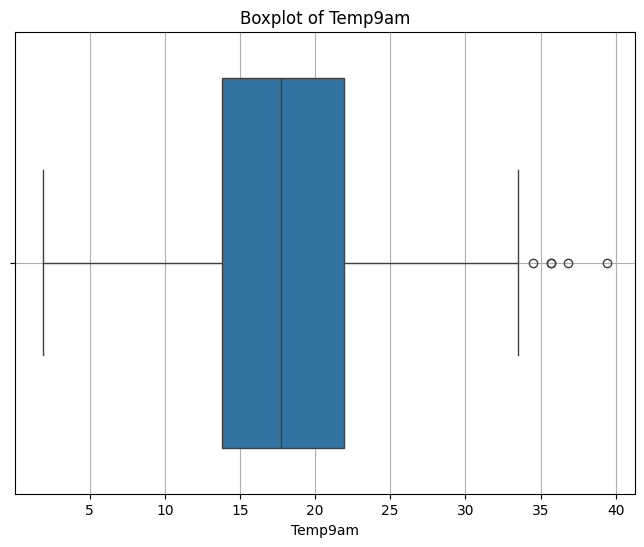

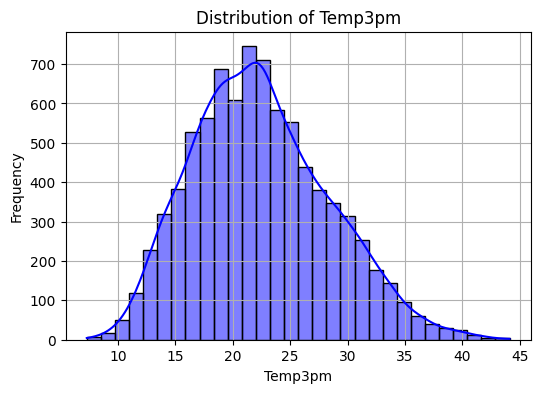

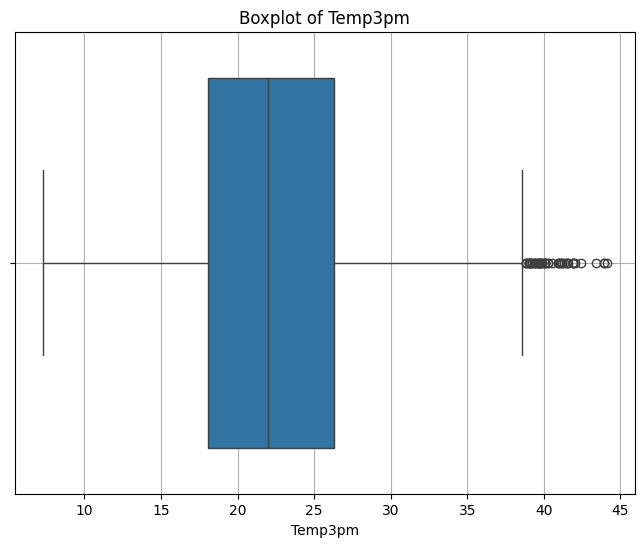

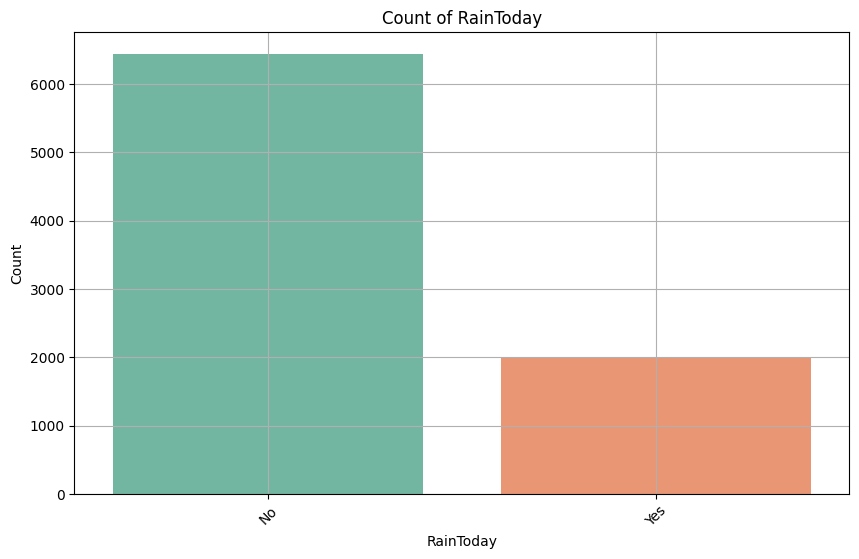

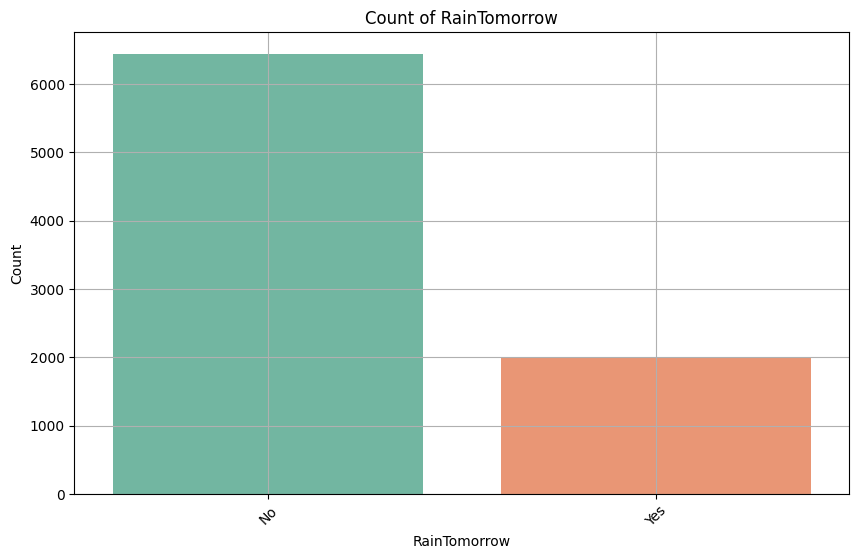

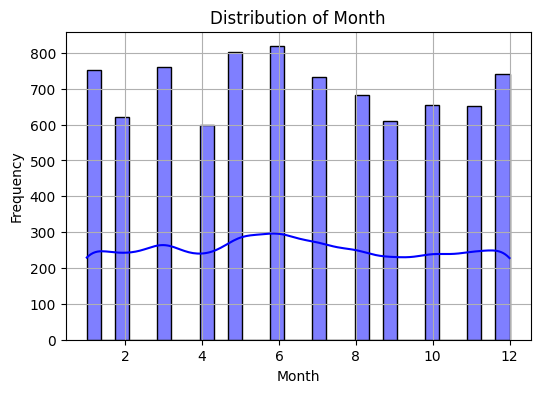

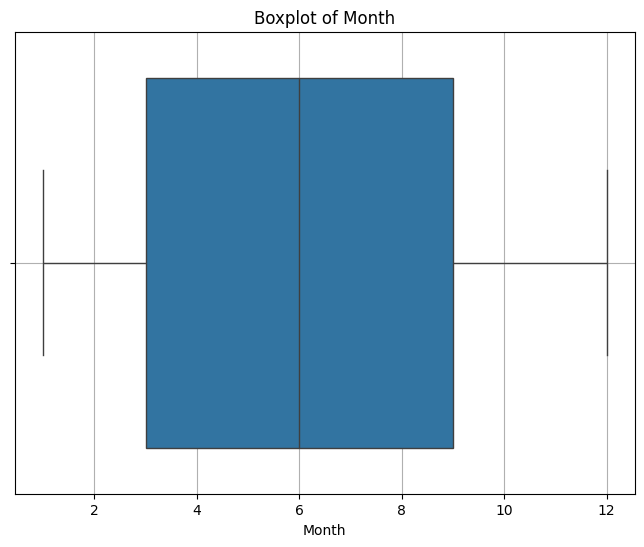

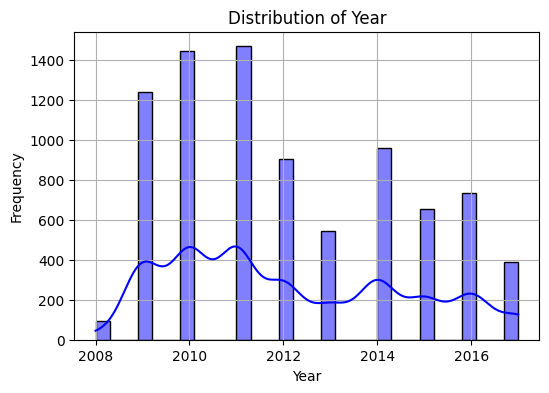

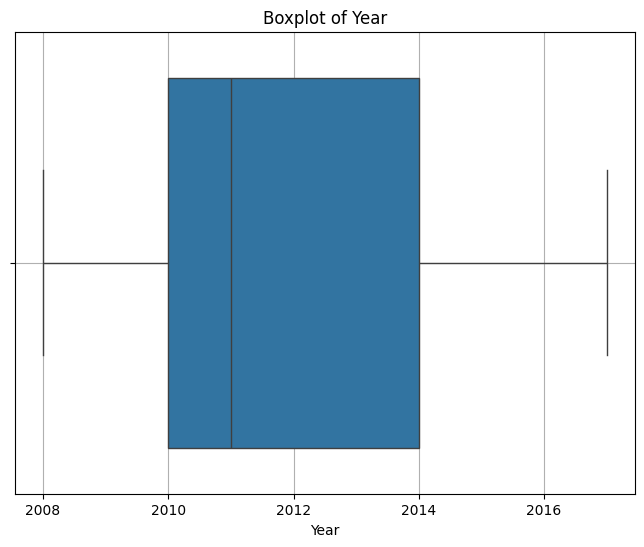

In [12]:
# Visualizations for all columns
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # Numerical columns: Histogram
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Boxplot for numerical columns (excluding RainTomorrow)
        if column != 'RainTomorrow':
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column].dropna())
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.grid(True)
            plt.show()
    elif df[column].dtype == 'object':
        # Categorical columns: Count plot
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[column].dropna(), palette='Set2')
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

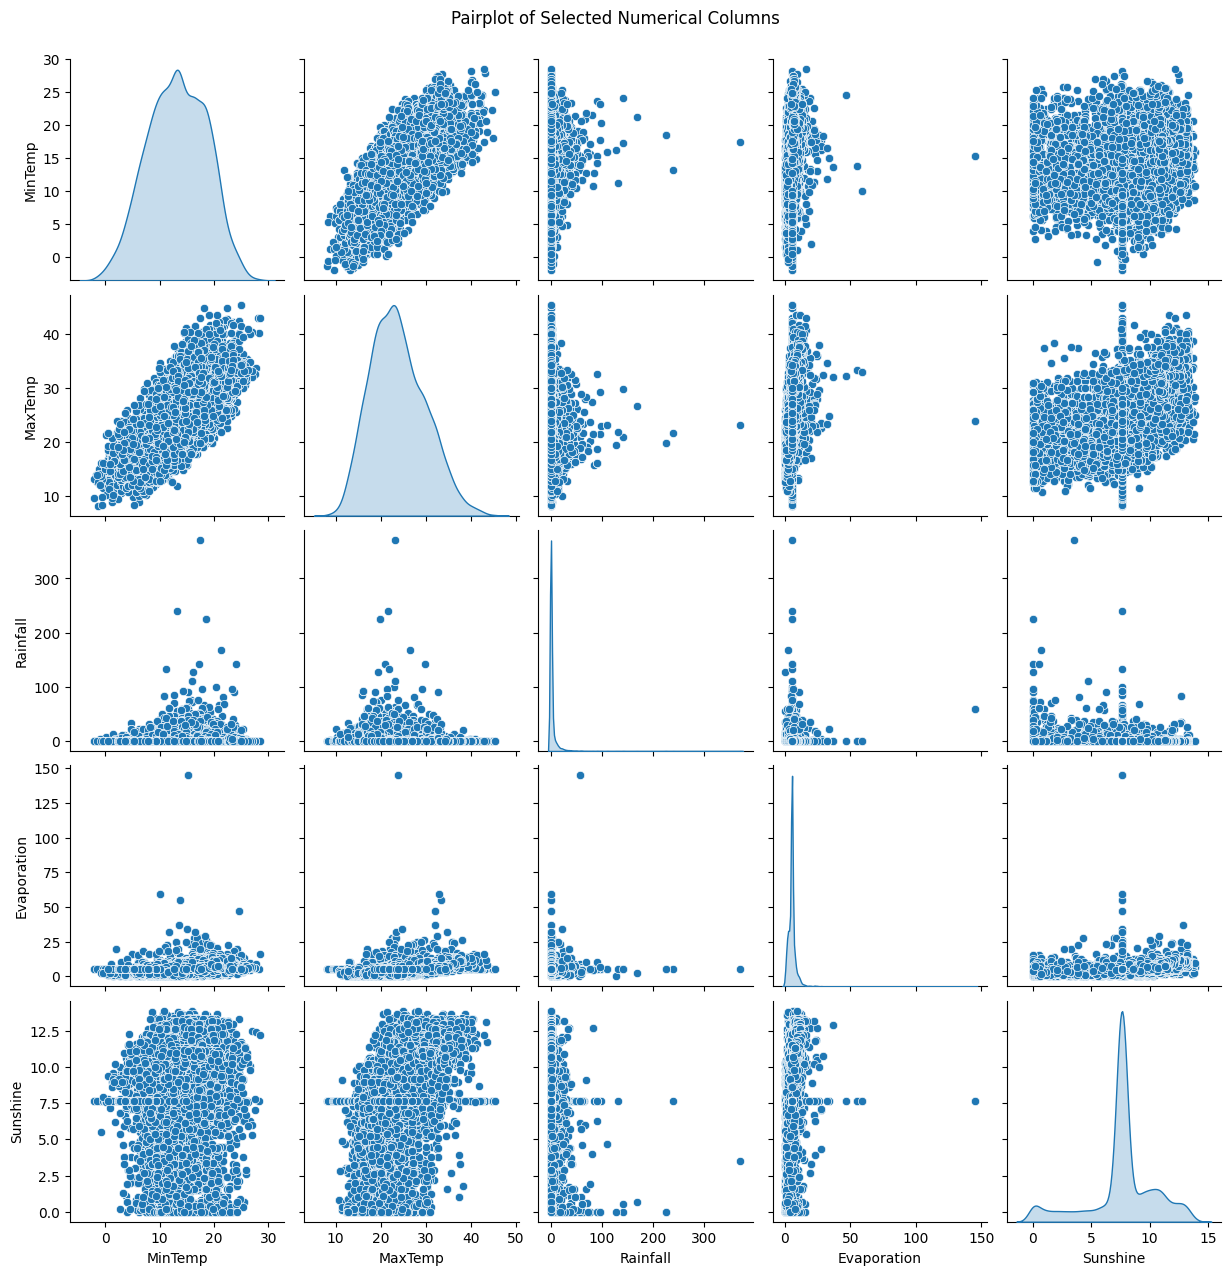

In [10]:
# Pairplot for selected numerical columns
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
sns.pairplot(df[numerical_columns].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Columns', y=1.02)
plt.show()

### Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
# Converting categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()

# Iterating through each column
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Display the updated DataFrame
print(df.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0          13          14  ...       1007.7       1007.1   
1           44.0           6          15  ...       1010.6       1007.8   
2           46.0          13          15  ...       1007.6       1008.7   
3           24.0           9           0  ...       1017.6       1012.8   
4           41.0           1           7  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Month  Y

### Outliers Detection And Treatment

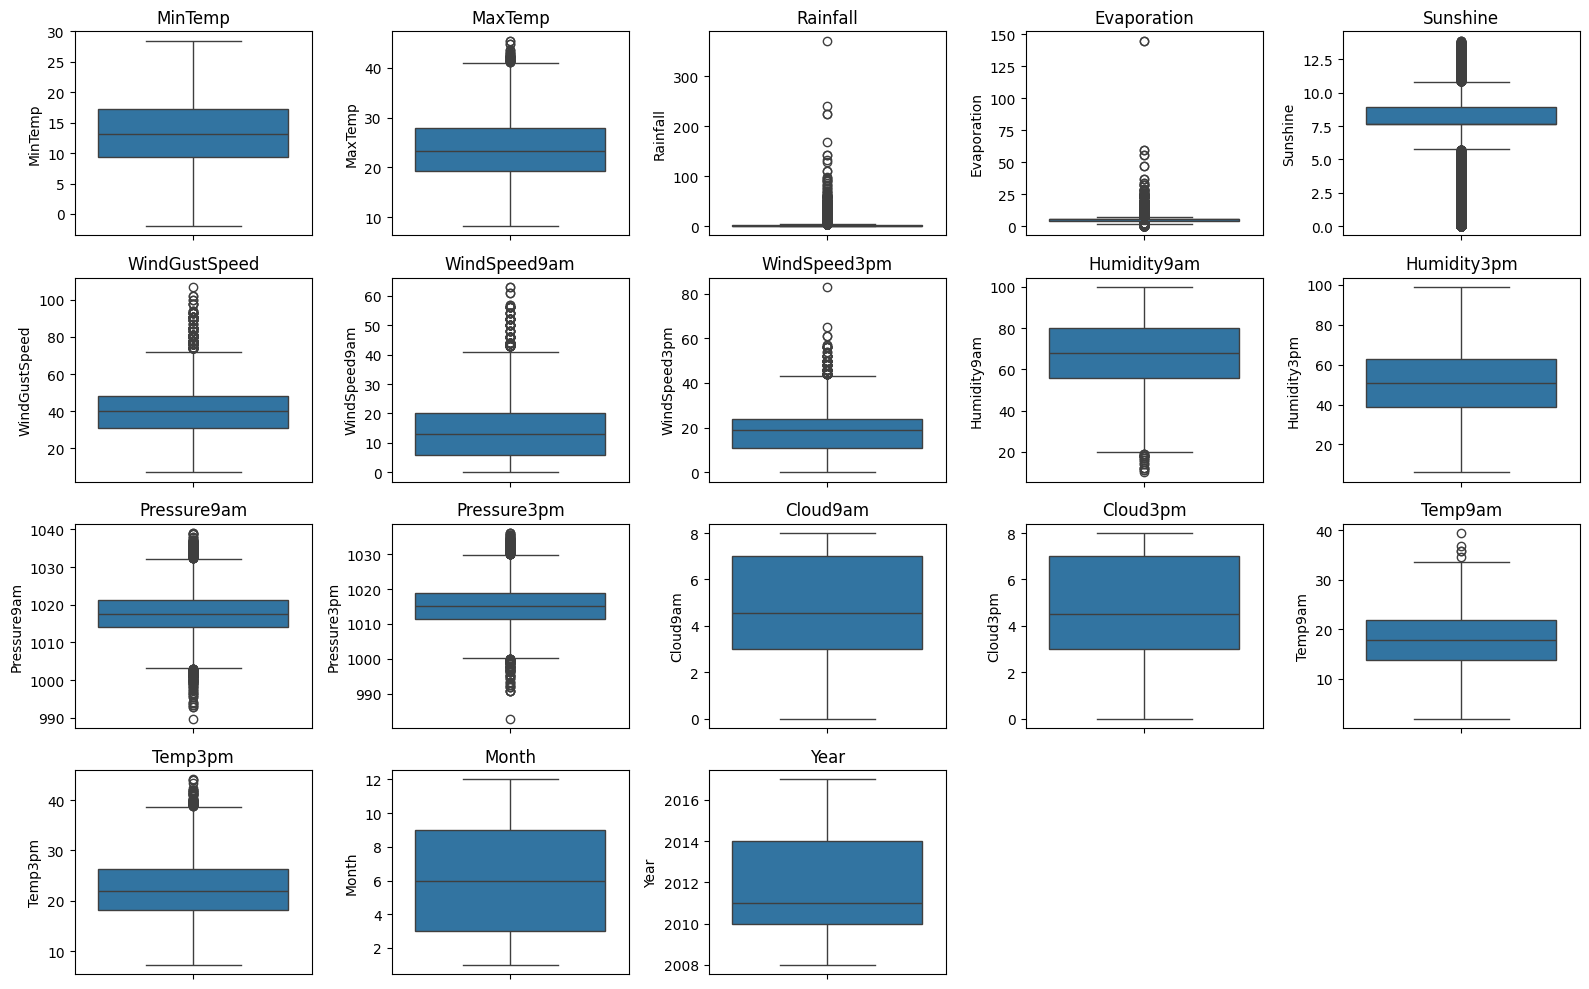

In [14]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64'])):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

There is presence of outliers in most of the columns except year, month, cloud3pm, cloud9pm, humidity3pm, mintemp. 

In [16]:
# Statistical Summary
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,...,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320,6.442136,2012.102433
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,...,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846,3.437994,2.473137
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,2008.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,...,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,3.000000,2010.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,...,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000,6.000000,2011.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,...,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,12.000000,2017.000000


In [17]:
# Outlier Removal
from scipy.stats import zscore

# Calculating Z-scores for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = zscore(df[numerical_cols])

# Defining a threshold (absolute Z-score > 3 is considered an outlier)
threshold = 3

# Removing outliers
df = df[(abs(z_scores) < threshold).all(axis=1)]

# Display the updated DataFrame shape
print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (7987, 24)


## Target- RainTomorrow

### Treating Class Imbalance 

As we have seen in visulization there is a class imbalance in our target variable [RainTomorrow] Let's treat that now.

In [18]:
from imblearn.over_sampling import SMOTE

# Checking class distribution before SMOTE
print("Class distribution before SMOTE:")
print(df['RainTomorrow'].value_counts())

# Applying SMOTE to balance the classes
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution before SMOTE:
0    6165
1    1822
Name: RainTomorrow, dtype: int64

Class distribution after SMOTE:
0    6165
1    6165
Name: RainTomorrow, dtype: int64


### Splitting the Dataset

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets for Raintomorrow as target
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9864, 23)
Shape of X_test: (2466, 23)
Shape of y_train: (9864,)
Shape of y_test: (2466,)


## Model Training and Evaluation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [24]:
# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, roc_auc

# Training and evaluating each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC Score': roc_auc
    }

# Displaying the results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score  ROC-AUC Score
Logistic Regression  0.779805   0.774527  0.762066  0.768246       0.861296
Decision Tree        0.892944   0.886920  0.889924  0.888419       0.892779
Random Forest        0.934307   0.921423  0.943268  0.932218       0.983546
Gradient Boosting    0.862125   0.852473  0.861135  0.856782       0.939317
SVM                  0.747770   0.728163  0.755292  0.741480       0.824786
KNN                  0.872263   0.806657  0.964437  0.878519       0.954771


Random Forest Followed by Decision Tree Model gives the highest accuract for predicting Raintomorrow.

## Evaluating Overfitting/Underfitting for Random Forest Model

In [25]:
# Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating on the training set
y_train_pred = rf_model.predict(X_train)
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

# Evaluating on the test set
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Display the results
print("Training Set Evaluation:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"ROC-AUC Score: {test_roc_auc}")

Training Set Evaluation:
Accuracy: 0.9998986212489862
Precision: 1.0
Recall: 0.9997993579454254
F1 Score: 0.9998996689073945
ROC-AUC Score: 0.9999997944241243

Test Set Evaluation:
Accuracy: 0.9314679643146796
Precision: 0.9161184210526315
Recall: 0.9432684165961049
F1 Score: 0.9294952023362537
ROC-AUC Score: 0.984162007399915


#### Interpretaion

Overfitting: The significant difference between training and test accuracy suggests that the model has overfitted the training data. It has learned the details and noise in the training data, which may not be present in the test data, leading to a drop in performance.

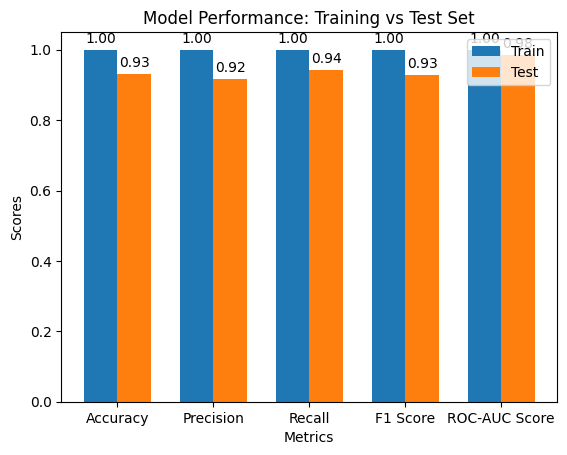

In [26]:
# Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc]
test_scores = [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, train_scores, width, label='Train')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance: Training vs Test Set')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding bar labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

### Cross Validation 

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Defining the model
rf_model = RandomForestClassifier(random_state=42)

# Defining the cross-validation method
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
cv_accuracy = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='precision')
cv_recall = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='f1')
cv_roc_auc = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='roc_auc')

# Calculating mean and standard deviation of the cross-validation scores
print("Cross-Validation Results:")
print(f"Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC-AUC Score: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

Cross-Validation Results:
Accuracy: 0.9376 ± 0.0037
Precision: 0.9326 ± 0.0072
Recall: 0.9436 ± 0.0047
F1 Score: 0.9380 ± 0.0036
ROC-AUC Score: 0.9836 ± 0.0020


These cross-validation results indicate that the Random Forest model is performing well with relatively consistent scores across different metrics. The low standard deviations suggest that the model's performance is stable across the folds.

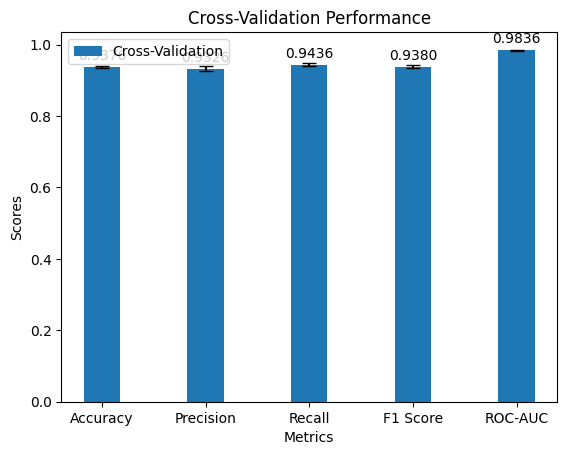

In [28]:
# Visualizing cross-validation results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
mean_scores = [0.9376, 0.9326, 0.9436, 0.9380, 0.9836]
std_scores = [0.0037, 0.0072, 0.0047, 0.0036, 0.0020]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, mean_scores, width, yerr=std_scores, capsize=5, label='Cross-Validation')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Cross-Validation Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding bar labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

## Saving The Model

In [29]:
import joblib

model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as random_forest_model.pkl


## Target-Rainfall

In [31]:
# Separating features (X) and target (y)
X = df.drop(columns=['Rainfall'])
y = df['Rainfall']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# Defining evaluation metrics function for regression
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        "Train MAE": train_mae, "Test MAE": test_mae,
        "Train RMSE": train_rmse, "Test RMSE": test_rmse,
        "Train R2 Score": train_r2, "Test R2 Score": test_r2
    }

In [42]:
# Initializing regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

In [43]:
# Evaluating regression models
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_regression_model(model, X_train, y_train, X_test, y_test)

# Display results
results_df = pd.DataFrame(results)
results_df.transpose()

Evaluating Linear Regression...
Evaluating Decision Tree Regressor...
Evaluating Random Forest Regressor...


,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2 Score,Test R2 Score
Linear Regression,1.613950e+00,1.652598,3.340850e+00,3.570494,0.489792,0.491327
Decision Tree Regressor,7.522113e-18,1.150317,5.575255e-17,3.755816,1.000000,0.437152
Random Forest Regressor,4.041286e-01,1.139458,1.074421e+00,3.041534,0.947231,0.630880


### Documentaion

This project focused on predicting rainfall in Australia using machine learning. We started by cleaning up the weather data, which included filling in missing values and converting dates and other details into numbers that computers can understand. We then looked at how different weather factors relate to each other using graphs. After that, we trained several models to predict rainfall amounts. We picked the best-performing model, which was the Random Forest Regressor, and saved it so we can use it later for predictions. This model helps forecast how much it might rain based on past weather data.